In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [121]:
train_data= pd.read_csv('clean2_data.csv', parse_dates = ['order_date'])
train_data

,order_date,sales_region_code,item_code,ord_qty
0,2015-09-02,101,20657,18
1,2015-09-02,102,20323,502
2,2015-09-02,102,20457,308
3,2015-09-02,102,21350,107
4,2015-09-03,102,20008,44
...,...,...,...,...
257033,2018-12-20,105,22006,10
257034,2018-12-20,105,22028,7
257035,2018-12-20,105,22058,56
257036,2018-12-20,105,22072,248


In [122]:
test_data= pd.read_csv('your_data_with_predictions.csv', parse_dates = ['order_date'])
test_data

,id,order_date,sales_region_code,item_code
0,0,2019-01-01,101,20002
1,1,2019-01-02,101,20002
2,2,2019-01-03,101,20002
3,3,2019-01-04,101,20002
4,4,2019-01-05,101,20002
...,...,...,...,...
196825,196825,2019-03-27,105,22084
196826,196826,2019-03-28,105,22084
196827,196827,2019-03-29,105,22084
196828,196828,2019-03-30,105,22084


In [123]:
data= pd.concat([train_data, test_data],sort= False)
data

,order_date,sales_region_code,item_code,ord_qty,id
0,2015-09-02,101,20657,18.0,NaN
1,2015-09-02,102,20323,502.0,NaN
2,2015-09-02,102,20457,308.0,NaN
3,2015-09-02,102,21350,107.0,NaN
4,2015-09-03,102,20008,44.0,NaN
...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,196825.0
196826,2019-03-28,105,22084,NaN,196826.0
196827,2019-03-29,105,22084,NaN,196827.0
196828,2019-03-30,105,22084,NaN,196828.0


In [124]:
sub_file= pd.read_csv('sample_submission.csv')

In [125]:
data.shape

(453868, 5)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453868 entries, 0 to 196829
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_date         453868 non-null  datetime64[ns]
 1   sales_region_code  453868 non-null  int64         
 2   item_code          453868 non-null  int64         
 3   ord_qty            257038 non-null  float64       
 4   id                 196830 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 20.8 MB


In [127]:
data.isnull().sum()

order_date                0
sales_region_code         0
item_code                 0
ord_qty              196830
id                   257038
dtype: int64

In [128]:
data[data.duplicated()]

,order_date,sales_region_code,item_code,ord_qty,id


In [129]:
data['sales_region_code'].unique()

array([101, 102, 103, 105], dtype=int64)

In [130]:
data['item_code'].unique()

array([20657, 20323, 20457, 21350, 20008, 20020, 20459, 20717, 20797,
       21003, 21271, 21347, 21379, 21644, 21745, 21920, 22035, 22046,
       20230, 20285, 20483, 20498, 20502, 20656, 20662, 20973, 20996,
       21239, 21297, 21484, 21533, 21601, 21703, 22047, 20189, 20271,
       20283, 20859, 20916, 21381, 20608, 21412, 21619, 21819, 21562,
       22082, 20092, 20226, 20576, 20584, 20712, 20810, 20912, 21739,
       21830, 20140, 20247, 20780, 20855, 21028, 21057, 21121, 21579,
       21659, 20620, 21690, 20413, 20342, 21583, 21982, 21279, 21442,
       21657, 21026, 21053, 21373, 21913, 20327, 20964, 21555, 21274,
       20445, 20139, 20589, 20694, 20988, 21542, 21764, 21517, 20392,
       21881, 21293, 20702, 21409, 21511, 21518, 20556, 21113, 21371,
       21306, 21789, 21461, 20433, 20573, 20900, 21888, 20368, 20637,
       20248, 21068, 21850, 21001, 20545, 20743, 20653, 20152, 20135,
       20134, 20408, 21039, 20276, 21449, 20155, 21418, 20528, 20846,
       20305, 20351,

In [131]:
data.groupby(["sales_region_code"]).agg({"ord_qty": ["count","sum", "mean", "median", "std", "min", "max"]})

ord_qty                                                  \
                    count         sum        mean median         std  min   
sales_region_code                                                           
101                 60651  10222665.0  168.548993   52.0  386.151314  1.0   
102                 69207  11125735.0  160.760255   55.0  298.549789  1.0   
103                 51498   9177589.0  178.212533   53.0  373.158653  1.0   
105                 75682  11282987.0  149.084155   43.0  313.909793  1.0   

                            
                       max  
sales_region_code           
101                21090.0  
102                 6086.0  
103                10598.0  
105                17162.0

In [132]:
data.groupby(["item_code"]).agg({"ord_qty": ["count","sum", "mean", "median", "std", "min", "max"]})

ord_qty                                                      
            count       sum        mean median         std  min     max
item_code                                                              
20002         462    8992.0   19.463203   11.0   31.208169  2.0   382.0
20003         931  219664.0  235.944146  130.0  296.539959  1.0  2585.0
20006         633   60622.0   95.769352   50.0  145.834614  2.0  1391.0
20008         311   14651.0   47.109325   31.0   43.855933  2.0   287.0
20014         760  244414.0  321.597368  178.0  418.034161  2.0  4217.0
...           ...       ...         ...    ...         ...  ...     ...
22072          46    3762.0   81.782609   61.5   80.566581  3.0   328.0
22081         617   25132.0   40.732577   21.0   49.735320  1.0   324.0
22082          30     646.0   21.533333   14.5   20.727682  3.0   105.0
22083         206   53242.0  258.456311   49.5  410.687140  2.0  2223.0
22084         351   11595.0   33.034188   11.0   56.872830  2.0   535.0

[849 rows x 7 columns]

In [133]:
data.groupby(['sales_region_code'])['item_code'].nunique()

sales_region_code
101    557
102    537
103    522
105    571
Name: item_code, dtype: int64

In [134]:
data.groupby(["sales_region_code"]).agg({"ord_qty": ["sum"]})

,ord_qty
,sum
sales_region_code,
101,10222665.0
102,11125735.0
103,9177589.0
105,11282987.0


In [135]:
data.groupby(['sales_region_code','item_code']).agg({'ord_qty':[ 'sum', 'mean', 'median', 'std']})

ord_qty                               
                                 sum        mean median         std
sales_region_code item_code                                        
101               20002        593.0   10.224138    8.0    6.923246
                  20003      10416.0  102.117647   69.5  107.493246
                  20006       3902.0   49.392405   38.0   46.524991
                  20014      80826.0  436.897297  273.0  526.850378
                  20016      37422.0  146.752941  102.0  161.461014
...                              ...         ...    ...         ...
105               22059        296.0    9.548387    9.0    5.214331
                  22066      48293.0  335.368056  198.0  418.330460
                  22072       3762.0   81.782609   61.5   80.566581
                  22083      13782.0  112.967213   14.0  295.909745
                  22084        439.0   16.884615    9.0   27.642470

[2187 rows x 4 columns]

Feature engineering is the process of adding new variables and features to the final dataset used to train a model utilizing historical row data.

In [136]:
def create_date_time_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.order_date.dt.dayofweek
    df['quarter'] = df.order_date.dt.quarter
    df['month'] = df.order_date.dt.month
    df['year'] = df.order_date.dt.year
    df['dayofyear'] = df.order_date.dt.dayofyear
    df['dayofmonth'] = df.order_date.dt.day
    df['weekofyear'] = df.order_date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [137]:
df1= create_date_time_features(data)
df1

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2015-09-02,101,20657,18.0,NaN,2,3,9,2015,245,2,36,3
1,2015-09-02,102,20323,502.0,NaN,2,3,9,2015,245,2,36,3
2,2015-09-02,102,20457,308.0,NaN,2,3,9,2015,245,2,36,3
3,2015-09-02,102,21350,107.0,NaN,2,3,9,2015,245,2,36,3
4,2015-09-03,102,20008,44.0,NaN,3,3,9,2015,246,3,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196825,2019-03-27,105,22084,NaN,196825.0,2,1,3,2019,86,27,13,1
196826,2019-03-28,105,22084,NaN,196826.0,3,1,3,2019,87,28,13,1
196827,2019-03-29,105,22084,NaN,196827.0,4,1,3,2019,88,29,13,1
196828,2019-03-30,105,22084,NaN,196828.0,5,1,3,2019,89,30,13,1


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453868 entries, 0 to 196829
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_date         453868 non-null  datetime64[ns]
 1   sales_region_code  453868 non-null  int64         
 2   item_code          453868 non-null  int64         
 3   ord_qty            257038 non-null  float64       
 4   id                 196830 non-null  float64       
 5   dayofweek          453868 non-null  int64         
 6   quarter            453868 non-null  int64         
 7   month              453868 non-null  int64         
 8   year               453868 non-null  int64         
 9   dayofyear          453868 non-null  int64         
 10  dayofmonth         453868 non-null  int64         
 11  weekofyear         453868 non-null  int64         
 12  season             453868 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), 

In [139]:
df1.groupby(["sales_region_code", "item_code", "year", "month"]).agg({"ord_qty": ["sum", "mean", "median", "std"]})

ord_qty                             
                                           sum       mean median        std
sales_region_code item_code year month                                     
101               20002     2017 8         4.0   4.000000    4.0        NaN
                            2018 3        17.0   4.250000    3.0   3.201562
                                 4       124.0  12.400000   10.0   8.235425
                                 5       110.0   9.166667    7.5   4.260460
                                 6        77.0   8.555556    7.0   6.802777
...                                        ...        ...    ...        ...
105               22084     2018 9       122.0  40.666667   11.0  56.659804
                                 10       11.0  11.000000   11.0        NaN
                            2019 1         0.0        NaN    NaN        NaN
                                 2         0.0        NaN    NaN        NaN
                                 3         0.0        NaN    NaN        NaN

[37385 rows x 4 columns]

In [140]:
df1.groupby(["sales_region_code", "item_code", "month"]).agg({"ord_qty": ["sum", "mean", "median", "std"]})

ord_qty                             
                                      sum       mean median        std
sales_region_code item_code month                                     
101               20002     1         0.0        NaN    NaN        NaN
                            2         0.0        NaN    NaN        NaN
                            3        17.0   4.250000    3.0   3.201562
                            4       124.0  12.400000   10.0   8.235425
                            5       110.0   9.166667    7.5   4.260460
...                                   ...        ...    ...        ...
105               22084     7        29.0   7.250000    7.0   2.629956
                            8       175.0  35.000000   10.0  43.817805
                            9       137.0  27.400000    9.0  44.003409
                            10       11.0  11.000000   11.0        NaN
                            12       16.0   8.000000    8.0   2.828427

[21548 rows x 4 columns]

In [141]:
def lag_features(df, lags):
    for lag in lags:
        df['ord_qty_lag_' + str(lag)] = df.groupby(["sales_region_code", "item_code"])['ord_qty'].transform(lambda x: x.shift(lag))
    return df

In [ ]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

In [143]:
df1.tail()

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,...,ord_qty_lag_91,ord_qty_lag_98,ord_qty_lag_105,ord_qty_lag_112,ord_qty_lag_119,ord_qty_lag_126,ord_qty_lag_182,ord_qty_lag_364,ord_qty_lag_546,ord_qty_lag_728
196825,2019-03-27,105,22084,NaN,196825.0,2,1,3,2019,86,...,106.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196826,2019-03-28,105,22084,NaN,196826.0,3,1,3,2019,87,...,10.0,6.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
196827,2019-03-29,105,22084,NaN,196827.0,4,1,3,2019,88,...,106.0,6.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
196828,2019-03-30,105,22084,NaN,196828.0,5,1,3,2019,89,...,5.0,10.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
196829,2019-03-31,105,22084,NaN,196829.0,6,1,3,2019,90,...,11.0,17.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
def roll_mean_features(df, windows):
    for window in windows:
        df['ord_qty_roll_mean_' + str(window)] = df.groupby(["sales_region_code", "item_code"])['ord_qty']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [145]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,...,ord_qty_lag_105,ord_qty_lag_112,ord_qty_lag_119,ord_qty_lag_126,ord_qty_lag_182,ord_qty_lag_364,ord_qty_lag_546,ord_qty_lag_728,ord_qty_roll_mean_365,ord_qty_roll_mean_546
0,2015-09-02,101,20657,18.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-09-02,102,20323,502.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-09-02,102,20457,308.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-09-02,102,21350,107.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-09-03,102,20008,44.0,NaN,3,3,9,2015,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df1.tail()

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,...,ord_qty_lag_105,ord_qty_lag_112,ord_qty_lag_119,ord_qty_lag_126,ord_qty_lag_182,ord_qty_lag_364,ord_qty_lag_546,ord_qty_lag_728,ord_qty_roll_mean_365,ord_qty_roll_mean_546
196825,2019-03-27,105,22084,NaN,196825.0,2,1,3,2019,86,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.065599,16.061421
196826,2019-03-28,105,22084,NaN,196826.0,3,1,3,2019,87,...,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,16.073831,16.069736
196827,2019-03-29,105,22084,NaN,196827.0,4,1,3,2019,88,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,16.081898,16.077885
196828,2019-03-30,105,22084,NaN,196828.0,5,1,3,2019,89,...,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,16.089807,16.085872
196829,2019-03-31,105,22084,NaN,196829.0,6,1,3,2019,90,...,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,16.097561,16.093703


In [147]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['ord_qty_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["sales_region_code", "item_code"])['ord_qty'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [148]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,...,ord_qty_ewm_alpha_07_lag_728,ord_qty_ewm_alpha_05_lag_91,ord_qty_ewm_alpha_05_lag_98,ord_qty_ewm_alpha_05_lag_105,ord_qty_ewm_alpha_05_lag_112,ord_qty_ewm_alpha_05_lag_180,ord_qty_ewm_alpha_05_lag_270,ord_qty_ewm_alpha_05_lag_365,ord_qty_ewm_alpha_05_lag_546,ord_qty_ewm_alpha_05_lag_728
0,2015-09-02,101,20657,18.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-09-02,102,20323,502.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-09-02,102,20457,308.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-09-02,102,21350,107.0,NaN,2,3,9,2015,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-09-03,102,20008,44.0,NaN,3,3,9,2015,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df1.tail()

,order_date,sales_region_code,item_code,ord_qty,id,dayofweek,quarter,month,year,dayofyear,...,ord_qty_ewm_alpha_07_lag_728,ord_qty_ewm_alpha_05_lag_91,ord_qty_ewm_alpha_05_lag_98,ord_qty_ewm_alpha_05_lag_105,ord_qty_ewm_alpha_05_lag_112,ord_qty_ewm_alpha_05_lag_180,ord_qty_ewm_alpha_05_lag_270,ord_qty_ewm_alpha_05_lag_365,ord_qty_ewm_alpha_05_lag_546,ord_qty_ewm_alpha_05_lag_728
196825,2019-03-27,105,22084,NaN,196825.0,2,1,3,2019,86,...,NaN,62.693045,6.706342,7.417323,NaN,NaN,NaN,NaN,NaN,NaN
196826,2019-03-28,105,22084,NaN,196826.0,3,1,3,2019,87,...,NaN,36.346516,6.353160,8.211765,8.000000,NaN,NaN,NaN,NaN,NaN
196827,2019-03-29,105,22084,NaN,196827.0,4,1,3,2019,88,...,NaN,71.173262,6.176577,6.602740,6.000000,NaN,NaN,NaN,NaN,NaN
196828,2019-03-30,105,22084,NaN,196828.0,5,1,3,2019,89,...,NaN,38.086629,8.088303,8.303030,7.714286,NaN,NaN,NaN,NaN,NaN
196829,2019-03-31,105,22084,NaN,196829.0,6,1,3,2019,90,...,NaN,24.543314,12.544169,8.651685,7.333333,NaN,NaN,NaN,NaN,NaN


In [150]:
df1.shape

(453868, 70)

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453868 entries, 0 to 196829
Data columns (total 70 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     453868 non-null  datetime64[ns]
 1   sales_region_code              453868 non-null  int64         
 2   item_code                      453868 non-null  int64         
 3   ord_qty                        257038 non-null  float64       
 4   id                             196830 non-null  float64       
 5   dayofweek                      453868 non-null  int64         
 6   quarter                        453868 non-null  int64         
 7   month                          453868 non-null  int64         
 8   year                           453868 non-null  int64         
 9   dayofyear                      453868 non-null  int64         
 10  dayofmonth                     453868 non-null  int64         
 11  

# One-Hot-Encoding

In [152]:
df2 = pd.get_dummies(df1, columns=['sales_region_code', 'item_code', 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(453868, 948)

# Logarithmic Transformation for Sales data

array([[<AxesSubplot:title={'center':'ord_qty'}>]], dtype=object)

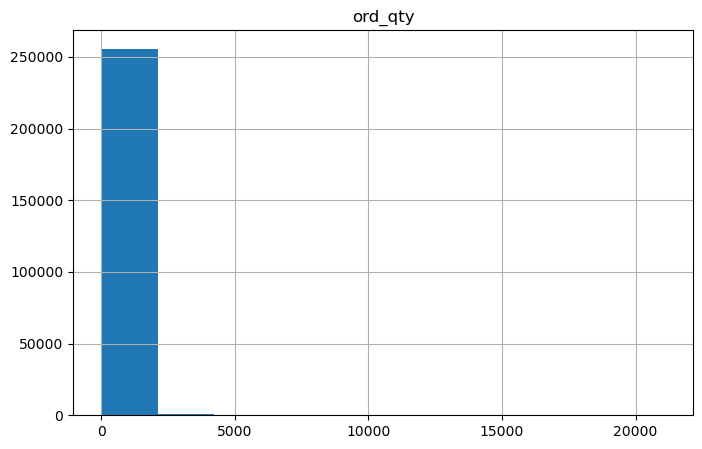

In [153]:
df2.hist('ord_qty',figsize=(8,5))

In [154]:
df2['ord_qty']= np.log1p(df2["ord_qty"].values)
df2.head()

,order_date,ord_qty,id,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,ord_qty_lag_105,ord_qty_lag_112,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
0,2015-09-02,2.944439,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
1,2015-09-02,6.220590,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,2015-09-02,5.733341,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
3,2015-09-02,4.682131,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
4,2015-09-03,3.806662,NaN,246,3,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1


array([[<AxesSubplot:title={'center':'ord_qty'}>]], dtype=object)

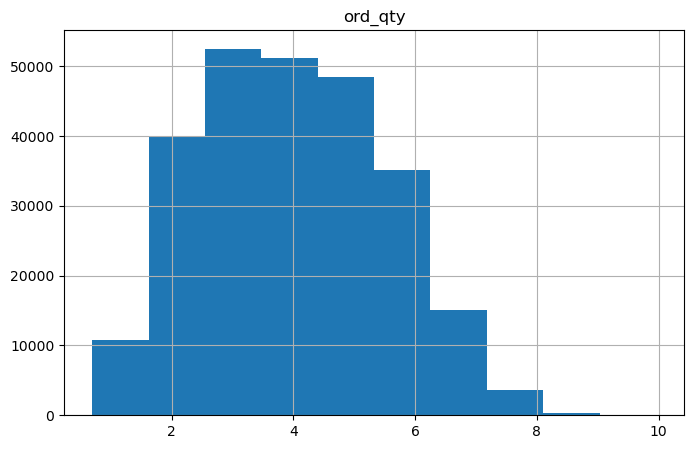

In [155]:
df2.hist('ord_qty',figsize=(8,5))

In [156]:
df_model= df2.copy()

In [157]:
df_model = df_model.sort_values("order_date").reset_index(drop = True)

In [158]:
train= df_model.loc[(df_model["order_date"] < "2018-01-01"), :]

val= df_model.loc[(df_model["order_date"] >= "2018-01-01") & (df_model["order_date"] < "2018-04-01"), :]

In [159]:
train

,order_date,ord_qty,id,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,ord_qty_lag_105,ord_qty_lag_112,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
0,2015-09-02,2.944439,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
1,2015-09-02,6.220590,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,2015-09-02,5.733341,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
3,2015-09-02,4.682131,NaN,245,2,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
4,2015-09-03,4.488636,NaN,246,3,36,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131045,2017-12-31,3.583519,NaN,365,31,52,207.0,102.0,93.0,296.0,...,1,0,0,1,0,0,1,0,0,0
131046,2017-12-31,6.630683,NaN,365,31,52,101.0,104.0,211.0,2.0,...,1,0,0,1,0,0,1,0,0,0
131047,2017-12-31,4.624973,NaN,365,31,52,263.0,165.0,820.0,609.0,...,1,0,0,1,0,0,1,0,0,0
131048,2017-12-31,5.493061,NaN,365,31,52,58.0,1036.0,170.0,306.0,...,1,0,0,1,0,0,1,0,0,0


In [160]:
val

,order_date,ord_qty,id,dayofyear,dayofmonth,weekofyear,ord_qty_lag_91,ord_qty_lag_98,ord_qty_lag_105,ord_qty_lag_112,...,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,season_0,season_1,season_2,season_3
131050,2018-01-01,2.944439,NaN,1,1,1,55.0,20.0,19.0,22.0,...,0,0,0,0,1,0,1,0,0,0
131051,2018-01-01,4.736198,NaN,1,1,1,65.0,55.0,158.0,50.0,...,0,0,0,0,1,0,1,0,0,0
131052,2018-01-01,2.302585,NaN,1,1,1,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
131053,2018-01-01,3.555348,NaN,1,1,1,236.0,474.0,384.0,227.0,...,0,0,0,0,1,0,1,0,0,0
131054,2018-01-01,3.637586,NaN,1,1,1,141.0,157.0,371.0,37.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157750,2018-03-31,5.755742,NaN,90,31,13,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0
157751,2018-03-31,2.079442,NaN,90,31,13,4.0,145.0,213.0,14.0,...,0,0,0,0,1,0,0,1,0,0
157752,2018-03-31,3.555348,NaN,90,31,13,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0
157753,2018-03-31,2.890372,NaN,90,31,13,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0


In [161]:
cols = [col for col in train.columns if col not in ['order_date', 'id', "ord_qty", "year"]]

In [162]:
X_train = train[cols]
Y_train = train['ord_qty']

X_val = val[cols]
Y_val = val['ord_qty']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((131050, 945), (131050,), (26705, 945), (26705,))

In [163]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [164]:
import xgboost as xgb

In [165]:
model= xgb.XGBRegressor()

In [166]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [167]:
%%time
# first_model= model.fit(X_train, Y_train,
#                        eval_metric=lambda y_pred, y_true: [xgb_smape(y_pred, y_true)]) #使用SMAPE做为评估指标
eval_set = [(X_train, Y_train), (X_val, Y_val)]
first_model = model.fit(X_train, Y_train, eval_metric='mae',eval_set=eval_set)  #使用MAE做评估指标
print("MODEL EVALUATION:")
print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))
print("Explained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("Mean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("Root Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("R2 score:", r2_score(Y_val, first_model.predict(X_val)))

[0]	validation_0-mae:2.62432	validation_1-mae:2.48081
[1]	validation_0-mae:1.90612	validation_1-mae:1.80244
[2]	validation_0-mae:1.48262	validation_1-mae:1.43682
[3]	validation_0-mae:1.24487	validation_1-mae:1.24784
[4]	validation_0-mae:1.11427	validation_1-mae:1.14820
[5]	validation_0-mae:1.04397	validation_1-mae:1.10020
[6]	validation_0-mae:1.00543	validation_1-mae:1.07673
[7]	validation_0-mae:0.98431	validation_1-mae:1.06618
[8]	validation_0-mae:0.97098	validation_1-mae:1.06100
[9]	validation_0-mae:0.96108	validation_1-mae:1.05995
[10]	validation_0-mae:0.95635	validation_1-mae:1.05994
[11]	validation_0-mae:0.95295	validation_1-mae:1.06131
[12]	validation_0-mae:0.94908	validation_1-mae:1.06275
[13]	validation_0-mae:0.94692	validation_1-mae:1.06517
[14]	validation_0-mae:0.94387	validation_1-mae:1.06520
[15]	validation_0-mae:0.94242	validation_1-mae:1.06609
[16]	validation_0-mae:0.94065	validation_1-mae:1.06579
[17]	validation_0-mae:0.93943	validation_1-mae:1.06594
[18]	validation_0-ma

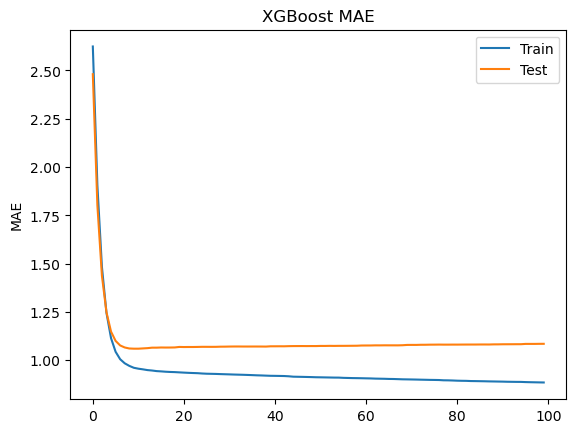

In [118]:
# retrieve performance metrics
results = first_model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

# plot MAE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()

# plot SMAPE
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['smape'], label='Train')
# ax.plot(x_axis, results['validation_1']['smape'], label='Test')
# ax.legend()
# plt.ylabel('SMAPE')
# plt.title('XGBoost SMAPE')
# plt.show()

# plot explained variance
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['ev'], label='Train')
# ax.plot(x_axis, results['validation_1']['ev'], label='Test')
# ax.legend()
# plt.ylabel('Explained Variance')
# plt.title('XGBoost Explained Variance')
# plt.show()

# plot RMSE
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
# ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
# ax.legend()
# plt.ylabel('RMSE')
# plt.title('XGBoost RMSE')
# plt.show()

# plot R2 score
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['r2'], label='Train')
# ax.plot(x_axis, results['validation_1']['r2'], label='Test')
# ax.legend()
# plt.ylabel('R2 Score')
# plt.title('XGBoost R2 Score')
# plt.show()

In [ ]:
feature_importance= pd.DataFrame(data = first_model.feature_importances_,
                 index  = X_train.columns,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

In [ ]:
plt.figure(figsize=(30, 10))
feature_importance.head(25).sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_final_model= df2.copy()
train = df_final_model.loc[~df_final_model.ord_qty.isna()]
Y_train = train['ord_qty']
X_train = train[cols]

test = df_final_model.loc[df_final_model.ord_qty.isna()]
X_test = test[cols]

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [ ]:
start = time()
xgb_params= {"colsample_bytree": 0.3, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

In [ ]:
test_preds

In [ ]:
submission_df = test.loc[:, ['id', 'ord_qty']]
submission_df['ord_qty'] = np.expm1(test_preds)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

In [ ]:
submission_df.to_csv('submission_xgbreg.csv', index=False)